In [1]:
#matplotlib
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import time
import matplotlib.pyplot as plt

from cana.boolean_node import *
from cana.boolean_network import *

from utils import *
from modules import *
from mean_field_computations import *
from brute_force_computations import *
from simulations import *
from entropy_computations import *
from driver_sets import *

In [3]:
N=BooleanNetwork.from_file('../models/[id-091]__[var-12]__[in-4]__[MAPK-REDUCED-3].txt',file_type='logical')

In [4]:
dd={node.name: LUT_reduce(look_up_table(node)) for node in N.nodes}
modules,translator={},{}
sunits,sunit_map=get_sunits(N)
rsunit_map = reverse_sunit_map(sunit_map)
print sunits
sunit_map, rsunit_map

set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])


({0: 'v_DNA_damage-0',
  1: 'v_DNA_damage-1',
  2: 'v_FGFR3_stimulus-0',
  3: 'v_FGFR3_stimulus-1',
  4: 'v_TGFBR_stimulus-0',
  5: 'v_TGFBR_stimulus-1',
  6: 'v_EGFR_stimulus-0',
  7: 'v_EGFR_stimulus-1',
  8: 'v_Apoptosis-0',
  9: 'v_Apoptosis-1',
  10: 'v_ERK-0',
  11: 'v_ERK-1',
  12: 'v_GADD45-0',
  13: 'v_GADD45-1',
  14: 'v_GRB2-0',
  15: 'v_GRB2-1',
  16: 'v_Growth_Arrest-0',
  17: 'v_Growth_Arrest-1',
  18: 'v_JNK-0',
  19: 'v_JNK-1',
  20: 'v_MDM2-0',
  21: 'v_MDM2-1',
  22: 'v_PI3K-0',
  23: 'v_PI3K-1',
  24: 'v_PLCG-0',
  25: 'v_PLCG-1',
  26: 'v_Proliferation-0',
  27: 'v_Proliferation-1',
  28: 'v_RAS-0',
  29: 'v_RAS-1',
  30: 'v_p38-0',
  31: 'v_p38-1'},
 {'v_Apoptosis-0': 8,
  'v_Apoptosis-1': 9,
  'v_DNA_damage-0': 0,
  'v_DNA_damage-1': 1,
  'v_EGFR_stimulus-0': 6,
  'v_EGFR_stimulus-1': 7,
  'v_ERK-0': 10,
  'v_ERK-1': 11,
  'v_FGFR3_stimulus-0': 2,
  'v_FGFR3_stimulus-1': 3,
  'v_GADD45-0': 12,
  'v_GADD45-1': 13,
  'v_GRB2-0': 14,
  'v_GRB2-1': 15,
  'v_Growth_Arr

In [5]:
def name_to_seed(name):
    return tuple(sorted(map(lambda sunit_name: rsunit_map[sunit_name], name)))

In [10]:
seed_size=1 #size of each seed set (may be anything, we will specify the seeds manually)
seeds = map(lambda name: name_to_seed(name), [
    ('v_DNA_damage-0',), ('v_FGFR3_stimulus-0',), ('v_TGFBR_stimulus-0',), ('v_EGFR_stimulus-0',),
    ('v_DNA_damage-1',), ('v_FGFR3_stimulus-1',), ('v_TGFBR_stimulus-1',), ('v_EGFR_stimulus-1',),
])
print seeds
iterations=20 #how long to run the IBMFA for
start_time = time.time()
modules,translator=find_modules(N,seed_size,sunits,sunit_map,modules,translator,seeds=seeds, reduced=True,ds=dd,
                pinning={},iterations=iterations,data=True,pin_start=True,update='asynchronous',regenerate=False,models=1)
print "--- Total time: %s seconds ---" % (time.time()-start_time)

[(0,), (2,), (4,), (6,), (1,), (3,), (5,), (7,)]
seeds: 8
--- Total time: 2.32138299942 seconds ---


In [7]:
translator, modules

({'(0,)': (0,),
  '(1,)': (1,),
  '(2,)': (2,),
  '(3,)': (3,),
  '(4,)': (4,),
  '(5,)': (5,),
  '(6,)': (6,),
  '(7,)': (7,)},
 {'(0,)': {0: {'v_Apoptosis': 0.5,
    'v_DNA_damage': 0.0,
    'v_EGFR_stimulus': 0.5,
    'v_ERK': 0.5,
    'v_FGFR3_stimulus': 0.5,
    'v_GADD45': 0.5,
    'v_GRB2': 0.5,
    'v_Growth_Arrest': 0.5,
    'v_JNK': 0.5,
    'v_MDM2': 0.5,
    'v_PI3K': 0.5,
    'v_PLCG': 0.5,
    'v_Proliferation': 0.5,
    'v_RAS': 0.5,
    'v_TGFBR_stimulus': 0.5,
    'v_p38': 0.5},
   1: {'v_Apoptosis': 0.0625,
    'v_DNA_damage': 0.0,
    'v_EGFR_stimulus': 0.5,
    'v_ERK': 0.140625,
    'v_FGFR3_stimulus': 0.5,
    'v_GADD45': 0.625,
    'v_GRB2': 0.609375,
    'v_Growth_Arrest': 0.25,
    'v_JNK': 0.59375,
    'v_MDM2': 0.125,
    'v_PI3K': 0.75,
    'v_PLCG': 0.21875,
    'v_Proliferation': 0.1875,
    'v_RAS': 0.625,
    'v_TGFBR_stimulus': 0.5,
    'v_p38': 0.59375},
   2: {'v_Apoptosis': 0.2650928497314453,
    'v_DNA_damage': 0.0,
    'v_EGFR_stimulus': 0.5,
    

In [11]:
seeds = modules.keys()
seed_entropy,seed_configs=seed_entropies(modules,seeds,normalized=True,data=False)
print "length:", len(seed_entropy)
seed_entropy, seed_configs

length: 8


({'(0,)': {0: 0.9375,
   1: 0.7946699351728644,
   2: 0.7283651958374001,
   3: 0.7008151130427561,
   4: 0.6774954643274043,
   5: 0.6723344217847569,
   6: 0.6700802905943463,
   7: 0.66915119054887,
   8: 0.6688596872278243,
   9: 0.6687245085061203,
   10: 0.6686752314517059,
   11: 0.668654670024601,
   12: 0.6686461138429043,
   13: 0.6686426989277217,
   14: 0.668641244391971,
   15: 0.6686406545852995,
   16: 0.6686404087460369,
   17: 0.6686403072987774,
   18: 0.668640265678883,
   19: 0.6686402484907833,
   20: 0.6686402414695825},
  '(1,)': {0: 0.9375,
   1: 0.5454200064948704,
   2: 0.37871222304576657,
   3: 0.36504792426183114,
   4: 0.3569270908220373,
   5: 0.35389145101284325,
   6: 0.35215677794675987,
   7: 0.3514537992208413,
   8: 0.351128291263022,
   9: 0.35098651321816177,
   10: 0.3509265659599659,
   11: 0.3509004581451356,
   12: 0.3508896042974236,
   13: 0.35088500447906423,
   14: 0.3508830914257735,
   15: 0.3508822977625614,
   16: 0.35088196895611967,


Lowest: (5,) [0.94, 0.5, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19] ['v_TGFBR_stimulus-1']
Highest: (4,) [0.94, 0.79, 0.75, 0.74, 0.74, 0.73, 0.73, 0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72] ['v_TGFBR_stimulus-0']


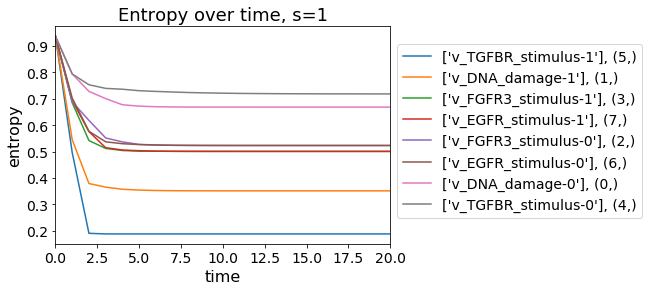

In [14]:
#graph predicted entropy over time
iterations,length=21,1
t=20 #iteration at which to compare seeds in order to sort them
sorted_entropies=sorted(seed_entropy,key=lambda x: seed_entropy[x][t])
print 'Lowest:',sorted_entropies[0],[round(seed_entropy[sorted_entropies[0]][t],2) for t in seed_entropy[sorted_entropies[0]]],
print to_list(sorted_entropies[0],sunit_map,translator)
print 'Highest:',sorted_entropies[-1],[round(seed_entropy[sorted_entropies[-1]][t],2) for t in seed_entropy[sorted_entropies[-1]]],
print to_list(sorted_entropies[-1],sunit_map,translator)
xvalues=range(iterations)
for index,seed in enumerate(sorted_entropies):
    plt.plot(xvalues,[seed_entropy[seed][t] for t in xvalues],label=str(to_list(seed,sunit_map,translator))+', '+str(seed))
plt.title("Entropy over time, s="+str(length),fontsize=18)
plt.ylabel("entropy",fontsize=16)
plt.xlabel("time",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,iterations-1])
plt.legend(bbox_to_anchor=(1.0, 0.95),fontsize=14)

In [55]:
start_time = time.time()
selections,entropies=top_selection(N,sunits,sunit_map,modules,translator,seeds=None,max_s=20,top=1,reduced=True,ds=dd,
        iterations=20,attractor=None,attractors=None,force=False,pin_start=True,update='asynchronous',regenerate=False,
        drivers=True)
for seed in selections: print(seed, entropies[seed], to_list(seed,sunit_map,translator))
driver = reduce_selection(seed,N,sunits,sunit_map,modules,translator,reduced=True,ds=dd,t=20) #reduce the final selection

print driver
print("--- Total time: %s seconds ---" % (time.time()-start_time))

('()', 0.5740698439744257, [])
('(5,)', 0.1875, ['v_TGFBR_stimulus-1'])
('(1, 5)', 0.125, ['v_DNA_damage-1', 'v_TGFBR_stimulus-1'])
('(1, 5, 6)', 0.0625, ['v_DNA_damage-1', 'v_TGFBR_stimulus-1', 'v_EGFR_stimulus-0'])
('(1, 2, 5, 6)', 0.0, ['v_DNA_damage-1', 'v_FGFR3_stimulus-0', 'v_TGFBR_stimulus-1', 'v_EGFR_stimulus-0'])


KeyError: 20

In [38]:
sorted(modules[str(driver)][10].items())

[('v_Apoptosis', 1.0),
 ('v_DNA_damage', 1.0),
 ('v_EGFR_stimulus', 0.0),
 ('v_ERK', 0.0),
 ('v_FGFR3_stimulus', 0.0),
 ('v_GADD45', 1.0),
 ('v_GRB2', 1.0),
 ('v_Growth_Arrest', 1.0),
 ('v_JNK', 1.0),
 ('v_MDM2', 0.0),
 ('v_PI3K', 1.0),
 ('v_PLCG', 0.0),
 ('v_Proliferation', 0.0),
 ('v_RAS', 1.0),
 ('v_TGFBR_stimulus', 1.0),
 ('v_p38', 1.0)]

In [16]:
modules[str(name_to_seed(['v_TGFBR_stimulus-1']))]

{0: {'v_Apoptosis': 0.5,
  'v_DNA_damage': 0.5,
  'v_EGFR_stimulus': 0.5,
  'v_ERK': 0.5,
  'v_FGFR3_stimulus': 0.5,
  'v_GADD45': 0.5,
  'v_GRB2': 0.5,
  'v_Growth_Arrest': 0.5,
  'v_JNK': 0.5,
  'v_MDM2': 0.5,
  'v_PI3K': 0.5,
  'v_PLCG': 0.5,
  'v_Proliferation': 0.5,
  'v_RAS': 0.5,
  'v_TGFBR_stimulus': 1.0,
  'v_p38': 0.5},
 1: {'v_Apoptosis': 0.8536074318780118,
  'v_DNA_damage': 0.5,
  'v_EGFR_stimulus': 0.5,
  'v_ERK': 0.004497454734519124,
  'v_FGFR3_stimulus': 0.5,
  'v_GADD45': 1.0,
  'v_GRB2': 1.0,
  'v_Growth_Arrest': 0.9461669921875,
  'v_JNK': 0.90625,
  'v_MDM2': 0.037353515625,
  'v_PI3K': 0.75,
  'v_PLCG': 0.18778109092090745,
  'v_Proliferation': 0.10693359375,
  'v_RAS': 0.625,
  'v_TGFBR_stimulus': 1.0,
  'v_p38': 0.9296875},
 2: {'v_Apoptosis': 1.0,
  'v_DNA_damage': 0.5,
  'v_EGFR_stimulus': 0.5,
  'v_ERK': 0.0,
  'v_FGFR3_stimulus': 0.5,
  'v_GADD45': 1.0,
  'v_GRB2': 1.0,
  'v_Growth_Arrest': 1.0,
  'v_JNK': 1.0,
  'v_MDM2': 0.0,
  'v_PI3K': 1.0,
  'v_PLCG': 0

In [15]:
modules[str(name_to_seed(['v_DNA_damage-1', 'v_EGFR_stimulus-0', 'v_FGFR3_stimulus-1', 'v_TGFBR_stimulus-0']))]

KeyError: '(1, 3, 4, 6)'

In [21]:
#find attractors
attractors=attractors_to_dict(N)
attractors

{'0000000000000000': {'v_Apoptosis-0',
  'v_DNA_damage-0',
  'v_EGFR_stimulus-0',
  'v_ERK-0',
  'v_FGFR3_stimulus-0',
  'v_GADD45-0',
  'v_GRB2-0',
  'v_Growth_Arrest-0',
  'v_JNK-0',
  'v_MDM2-0',
  'v_PI3K-0',
  'v_PLCG-0',
  'v_Proliferation-0',
  'v_RAS-0',
  'v_TGFBR_stimulus-0',
  'v_p38-0'},
 '0000000000110000': {'v_Apoptosis-0',
  'v_DNA_damage-0',
  'v_EGFR_stimulus-0',
  'v_ERK-0',
  'v_FGFR3_stimulus-0',
  'v_GADD45-0',
  'v_GRB2-0',
  'v_Growth_Arrest-0',
  'v_JNK-0',
  'v_MDM2-1',
  'v_PI3K-1',
  'v_PLCG-0',
  'v_Proliferation-0',
  'v_RAS-0',
  'v_TGFBR_stimulus-0',
  'v_p38-0'},
 '0010101111010011': {'v_Apoptosis-1',
  'v_DNA_damage-0',
  'v_EGFR_stimulus-0',
  'v_ERK-0',
  'v_FGFR3_stimulus-0',
  'v_GADD45-1',
  'v_GRB2-1',
  'v_Growth_Arrest-1',
  'v_JNK-1',
  'v_MDM2-0',
  'v_PI3K-1',
  'v_PLCG-0',
  'v_Proliferation-0',
  'v_RAS-1',
  'v_TGFBR_stimulus-1',
  'v_p38-1'},
 '0011101111010011': {'v_Apoptosis-1',
  'v_DNA_damage-0',
  'v_EGFR_stimulus-1',
  'v_ERK-0',
  

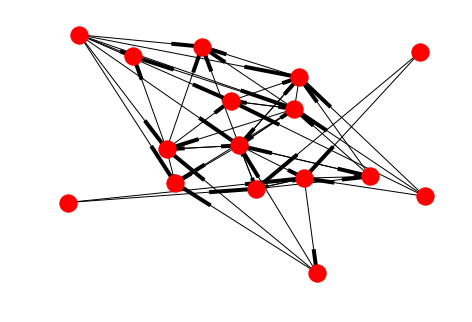

In [26]:
import networkx as nx

nx.draw(N._sg)

In [22]:
#find driver set for all attractors
iterations=10 #how long to run the IBMFA
t=iterations #at which iteration to compare entropy when making selections
drivers={}
for i,attractor in enumerate(attractors):
    selection=driver_selection(N,sunits,sunit_map,modules,translator,attractor=attractor,attractors=attractors,
                iterations=iterations,t=t,update='synchronous',order=None,regenerate=False)
    drivers[i]=selection
    print(i,attractor)
    print(selection)
    #print(selection,to_list(selection,sunit_map))

['()', '(5,)', '(1, 5)', '(1, 5, 6)', '(1, 2, 5, 6)'] {'(1, 5)': 0.125, '(1,)': 0.350965718724163, '(1, 5, 6)': 0.0625, '(2, 5)': 0.125, '(5,)': 0.1875, '(1, 2, 5, 6)': 0.0, '(5, 6)': 0.125, '(1, 2, 5)': 0.0625, '()': 0.5745365034260562, '(2,)': 0.5233944141521307, '(6,)': 0.5233944141521307}
(0, '1010101111010011')
(1, 2, 5, 6)
['()', '(3,)', '(3, 6)', '(3, 4, 6)', '(0, 3, 4, 6)', '(0, 3, 4, 6)', '(0, 3, 4, 6)', '(0, 3, 4, 6)', '(0, 3, 4, 6)', '(0, 3, 4, 6)', '(0, 3, 4, 6)'] {'(3, 4, 6)': 0.42152049261006475, '(0, 3, 6)': 0.5349539693988069, '(3, 6)': 0.4387865494614108, '(3,)': 0.5012865494614105, '(3, 4)': 0.48402049261006475, '(0,)': 0.669766567859414, '(0, 3, 4, 6)': 0.12944943541445503, '()': 0.5745365034260562, '(4,)': 0.7302326747361414, '(0, 3)': 0.5974539693988068, '(6,)': 0.5233944141521307}
(1, ('0100000000010110', '0100010101111001'))
None
['()', '(6,)', '(2, 6)', '(2, 6)', '(2, 6)', '(2, 6)', '(2, 6)', '(2, 6)', '(2, 6)', '(2, 6)', '(2, 6)'] {'(4, 6)': 0.6666031846641126,

['()', '(5,)', '(0, 5)', '(0, 2, 5)', '(0, 2, 5, 7)'] {'(0, 2, 5)': 0.0625, '(0, 5)': 0.125, '(2, 5)': 0.125, '(5,)': 0.1875, '(7,)': 0.5012865494614105, '(0, 5, 7)': 0.0625, '(0,)': 0.669766567859414, '()': 0.5745365034260562, '(5, 7)': 0.125, '(0, 2, 5, 7)': 0.0, '(2,)': 0.5233944141521307}
(19, '0011101111010011')
(0, 2, 5, 7)


In [ ]:
attr_str = 'v_Apoptosisv_DNA_damage!v_EGFR_stimulus!v_ERK!v_FGFR3_stimulusv_GADD45v_GRB2v_Growth_Arrestv_JNK!v_MDM2v_PI3K!v_PLCG!v_Proliferationv_RASv_TGFBR_stimulusv_p38'
attr = set()
start = 0
while not start == -1:
    end = attr_str.find('v_', start + 1)
    if end == -1:
        word = attr_str[start:]
    else:
        word = attr_str[start:end]
    if word[-1] == '!':
        word = word[:-1] + '-0'
    else:
        word = word + '-1'
    attr.add(word)
    start = end
attr